In [1]:
import boto3
import logging 
from botocore.exceptions import ClientError

import pandas as pd 
import io
import pyarrow
import numpy as np 

### Read in parquet files from S3 as pandas dataframe     

In [2]:
# Function to read the parquet file as pandas dataframe 

filename = "records.parquet"
bucket_name = "webpresence-geocore-geojson-to-parquet-dev"

def open_s3_file(bucket, filename):
    """Open a S3 parquet file from bucket and filename and return the parquet as pandas dataframe
    :param bucket: Bucket name
    :param filename: Specific file name to open
    :return: body of the file as a string
    """
    try: 
        buffer = io.BytesIO()
        s3 = boto3.resource('s3')
        object = s3.Object(bucket, filename)
        object.download_fileobj(buffer)
        df = pd.read_parquet(buffer)
        
        return df
    except ClientError as e:
        logging.error(e)
        return False
    
df = open_s3_file(bucket_name, filename)
df.head()

,features_type,features_geometry_type,features_geometry_coordinates,features_properties_id,features_properties_title_en,features_properties_title_fr,features_properties_description_en,features_properties_description_fr,features_properties_keywords_en,features_properties_keywords_fr,...,features_properties_credits,features_properties_cited,features_properties_distributor,features_properties_options,features_properties_temporalExtent_end_@indeterminatePosition,features_properties_temporalExtent_end_#text,features_properties_plugins,features_properties_sourceSystemName,features_stac_version,features_popularity
0,Feature,Polygon,"[[[-141.003, 41.6755], [-52.6174, 41.6755], [-...",000183ed-8864-42f0-ae43-c4313a860720,"Principal Mineral Areas, Producing Mines, and ...","Principales régions minières, principales mine...",This dataset is produced and published annuall...,Ce jeu de données est produit et publié annuel...,"mineralization, mineral occurrences, mines, hy...","minéralisation, indices minéralisés, mines, hy...",...,[],"[{""individual"": ""null"", ""position"": {""en"": ""nu...","[{""individual"": ""null"", ""position"": {""en"": ""nu...","[{""url"": ""https://maps-cartes.services.geo.ca/...",<NA>,<NA>,NaN,<NA>,<NA>,0
1,Feature,Polygon,"[[[-141.003, 41.6755], [-52.6174, 41.6755], [-...",0005301b-624e-4000-8dad-a1a1ac6b46c2,Land Surface Evapotranspiration for Canada's L...,Évapotranspiration de la surface terrestre con...,The dataset contains land surface evapotranspi...,Le jeu de données représente l'évapotranspirat...,"Land, Atmosphere, Ecosystems, Water, Meteorolo...","Terre, Atmosphère, Écosystème, Eau, Météorolog...",...,[],"[{""individual"": ""Wang, Shusen"", ""position"": {""...","[{""individual"": ""null"", ""position"": {""en"": ""nu...","[{""url"": ""https://maps-cartes.services.geo.ca/...",<NA>,<NA>,NaN,<NA>,<NA>,0
2,Feature,Polygon,"[[[-66.5, 43.3], [-59.5, 43.3], [-59.5, 47.3],...",000a51f1-3781-a262-35f2-ff83df4898d9,Licensed Lenders in Nova Scotia,Prêteurs autorisés en Nouvelle-Écosse,Businesses licensed to extend credit or provid...,Entreprises autorisées à accorder du crédit ou...,"lender, credit, borrowing, financing, Governme...","prêteur, crédit, emprunt, financement, Informa...",...,[],"[{""individual"": ""null"", ""position"": {""en"": ""nu...","[{""individual"": ""null"", ""position"": {""en"": ""nu...","[{""url"": ""https://data.novascotia.ca/api/views...",<NA>,<NA>,NaN,<NA>,<NA>,0
3,Feature,Polygon,"[[[-64.413568, 45.948188], [-61.970755, 45.948...",000c6ea0-fd88-6bb0-f901-a6e8b213f1c9,OD0139 PEI Confederation Trail,OD0139 SENTIER DE LA CONFÉDÉRATION DE,Available as an ESRI ArcGIS Shapefile. This da...,Disponible en tant que Shapefile ESRI ArcGIS. ...,"Prince Edward Island data, Government information","Données de l'Île-du-Prince-Édouard, Informatio...",...,[],"[{""individual"": ""null"", ""position"": {""en"": ""nu...","[{""individual"": ""null"", ""position"": {""en"": ""nu...","[{""url"": ""https://data.princeedwardisland.ca/d...",<NA>,<NA>,NaN,<NA>,<NA>,0
4,Feature,Polygon,"[[[-141, 60], [-123.8, 60], [-123.8, 69.7], [-...",001c30bd-0869-22a7-ef10-2284e8f9b560,Yukon Reference Information,Informations de référence du Yukon,Created for distribution by the GeoYukon appli...,Créé pour être distribué par l'application Geo...,"map, places, index, airphotos, communities, Go...","carte, lieux, index, photos aériennes, communa...",...,[],"[{""individual"": ""null"", ""position"": {""en"": ""nu...","[{""individual"": ""null"", ""position"": {""en"": ""nu...","[{""url"": ""https://mapservices.gov.yk.ca/arcgis...",<NA>,<NA>,NaN,<NA>,<NA>,0


### Data cleaning 
<br/> Dataset structure: size, column names, datatype 


In [3]:
df.info() 
# Colnames and save them as a list 
row_count, column_count = df.shape 
print(f'The shape of the parquet file is {df.shape}')
colnames = list(df.columns)
#print(f'Parquet file column names are {colnames}')

# Column data types 
colDataType = df.dtypes
#print(f'The data type of each column is {df.dtypes}')
col_int64 = df.dtypes[df.dtypes=='int64']
print(f'The columns that have int64 as data tyep is {col_int64}') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7625 entries, 0 to 7624
Data columns (total 69 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   features_type                                                  7625 non-null   string
 1   features_geometry_type                                         7625 non-null   string
 2   features_geometry_coordinates                                  7624 non-null   string
 3   features_properties_id                                         7625 non-null   string
 4   features_properties_title_en                                   7624 non-null   string
 5   features_properties_title_fr                                   7624 non-null   string
 6   features_properties_description_en                             7497 non-null   string
 7   features_properties_description_fr                             7497 n

#### Select key English columns  
- English columns for now: uuid, title, keywords, description 


In [4]:
# df.loc[] and df.iloc[] select rows 
selected_cols = ['features_properties_id', 'features_properties_title_en','features_properties_description_en','features_properties_keywords_en']
df_en = df[selected_cols]
#df_text = df[['features_properties_id', 'features_properties_title_en']]
df_en.head()

,features_properties_id,features_properties_title_en,features_properties_description_en,features_properties_keywords_en
0,000183ed-8864-42f0-ae43-c4313a860720,"Principal Mineral Areas, Producing Mines, and ...",This dataset is produced and published annuall...,"mineralization, mineral occurrences, mines, hy..."
1,0005301b-624e-4000-8dad-a1a1ac6b46c2,Land Surface Evapotranspiration for Canada's L...,The dataset contains land surface evapotranspi...,"Land, Atmosphere, Ecosystems, Water, Meteorolo..."
2,000a51f1-3781-a262-35f2-ff83df4898d9,Licensed Lenders in Nova Scotia,Businesses licensed to extend credit or provid...,"lender, credit, borrowing, financing, Governme..."
3,000c6ea0-fd88-6bb0-f901-a6e8b213f1c9,OD0139 PEI Confederation Trail,Available as an ESRI ArcGIS Shapefile. This da...,"Prince Edward Island data, Government information"
4,001c30bd-0869-22a7-ef10-2284e8f9b560,Yukon Reference Information,Created for distribution by the GeoYukon appli...,"map, places, index, airphotos, communities, Go..."


#### Missing values 
- Replace NaN values with empty string 
- Replace 'Not Available; Indisponible' with empty string 


 
 

In [5]:
print("The NaN values in the English columns are \n") 
df_en.info()
# Deelte 
# Replace NaN with empty string for 
df_en.features_properties_title_en = df_en.features_properties_title_en.fillna('')
df_en.features_properties_description_en = df_en.features_properties_description_en.fillna('')
df_en.features_properties_keywords_en = df_en.features_properties_keywords_en.fillna('')
#df_en.features_properties_topicCategory = df_en.features_properties_topicCategory.fillna('')

# Replace "Not Available; Indisponible" with empty string 
df_en.features_properties_title_en = df_en.features_properties_title_en.replace('Not Available; Indisponible', '')
df_en.features_properties_description_en = df_en.features_properties_description_en.replace('Not Available; Indisponible', '')
df_en.features_properties_keywords_en = df_en.features_properties_keywords_en.replace('Not Available; Indisponible', '')
#df_en.features_properties_topicCategory = df_en.features_properties_topicCategory.replace('Not Available; Indisponible', '') # extact match 
print("The NaN values in the English columns after cleaning are \n") 
df_en.info()

The NaN values in the English columns are 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7625 entries, 0 to 7624
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   features_properties_id              7625 non-null   string
 1   features_properties_title_en        7624 non-null   string
 2   features_properties_description_en  7497 non-null   string
 3   features_properties_keywords_en     5992 non-null   string
dtypes: string(4)
memory usage: 238.4 KB
The NaN values in the English columns after cleaning are 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7625 entries, 0 to 7624
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   features_properties_id              7625 non-null   string
 1   features_properties_title_en        7625 non-null   string
 2  

C:\Users\xcai\AppData\Local\Temp\ipykernel_9724\2847183094.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_en.features_properties_title_en = df_en.features_properties_title_en.fillna('')
C:\Users\xcai\AppData\Local\Temp\ipykernel_9724\2847183094.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_en.features_properties_description_en = df_en.features_properties_description_en.fillna('')
C:\Users\xcai\AppData\Local\Temp\ipykernel_9724\2847183094.py:7: SettingWithCopyWarning: 
A value is trying to b

#### Duplicated values 
- Concatenate the four English Text columns to a new column 'text_en'
- Delete the uuid with empty string in column 'title'. If we are being strict, we will delete the duplicated uuid in 'text'. Becuase if 'text' is duplicated, it means the title, keywords, description, and category are identical for this uuid. 

In [6]:
df_en['text_en'] = df_en['features_properties_title_en'] + ' ' + df_en['features_properties_description_en'] + ' ' + df_en['features_properties_keywords_en'] 
# Change the empty string to NaN 
df_en['text_en'] .replace('', float('NaN'), inplace=True)
# Delete the uuid with NaN in title  
df_en.dropna(subset = ['features_properties_title_en'], inplace = True) 
print(df_en.info)

""" Delete uuid if the 'text_en' is duplicated
df_duplicate = pd.concat(g for _, g in df_en.groupby('text_en') if len(g) > 1)
#df_duplicate.to_parquet("duplicated records.parquet")
df_en_dup = df_en.drop_duplicates(subset=['text_en'])
print(df_en_dup.shape)
"""

C:\Users\xcai\AppData\Local\Temp\ipykernel_9724\1076112947.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_en['text_en'] = df_en['features_properties_title_en'] + ' ' + df_en['features_properties_description_en'] + ' ' + df_en['features_properties_keywords_en']


<bound method DataFrame.info of                     features_properties_id  \
0     000183ed-8864-42f0-ae43-c4313a860720   
1     0005301b-624e-4000-8dad-a1a1ac6b46c2   
2     000a51f1-3781-a262-35f2-ff83df4898d9   
3     000c6ea0-fd88-6bb0-f901-a6e8b213f1c9   
4     001c30bd-0869-22a7-ef10-2284e8f9b560   
...                                    ...   
7620  ffd36a6f-405e-1de0-5b9c-d52e8cac1542   
7621  fff64fdd-2b42-4b65-af59-16f89e3507b6   
7622  fff7604f-8963-4210-aead-8fc9cade59b7   
7623  ffff0ff4-1b21-11eb-8cca-1860247f53e3   
7624  de2e27d9-2458-4fab-b723-3a91c555b84f   

                           features_properties_title_en  \
0     Principal Mineral Areas, Producing Mines, and ...   
1     Land Surface Evapotranspiration for Canada's L...   
2                       Licensed Lenders in Nova Scotia   
3                        OD0139 PEI Confederation Trail   
4                           Yukon Reference Information   
...                                                 ...   
76

C:\Users\xcai\AppData\Local\Temp\ipykernel_9724\1076112947.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_en['text_en'] .replace('', float('NaN'), inplace=True)
C:\Users\xcai\AppData\Local\Temp\ipykernel_9724\1076112947.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_en.dropna(subset = ['features_properties_title_en'], inplace = True)


' Delete uuid if the \'text_en\' is duplicated\ndf_duplicate = pd.concat(g for _, g in df_en.groupby(\'text_en\') if len(g) > 1)\n#df_duplicate.to_parquet("duplicated records.parquet")\ndf_en_dup = df_en.drop_duplicates(subset=[\'text_en\'])\nprint(df_en_dup.shape)\n'

### Preprocessing 
- Convert to lower case 
- Remove [stop words](https://gist.github.com/ethen8181/d57e762f81aa643744c2ffba5688d33a) 
- Remove [punctuation](https://towardsdatascience.com/tf-idf-for-document-ranking-from-scratch-in-python-on-real-world-dataset-796d339a4089) 
- Remove apostrophe



In [7]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

print("Stop words are  {}".format(stopwords.words('english')))


Stop words are  ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same',

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\xcai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
# convert to lower case 
def convert_lower_case(data):
    """
    :param data: a tstring column in panda.data.frame
    """
    return data.str.lower()

In [9]:

# Stop words are the most commonly occurring words that don’t give any additional value to the document vector.
def remove_stop_words(data):
    stop_words = stopwords.words('english') # English stop words see:https://gist.github.com/ethen8181/d57e762f81aa643744c2ffba5688d33a
    data = data.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
    return data

In [10]:
# Remove punctuation 
def remove_punctuation(data):
    data = data.str.replace(r'[^\w\s]+', '')
    return data

In [11]:
# Remove apostrophe, you're to you are 
def remove_apostrophe(data):
    data = data.str.replace(r"[\"\',]", '')
    return data

In [12]:
def preprocess(data):
    data = convert_lower_case(data)
    data = remove_punctuation(data) #remove comma seperately
    data = remove_apostrophe(data)
    data = remove_stop_words(data)
    return data
df_en['title_en_cleaned'] = preprocess(df_en['features_properties_title_en'])
df_en['text_en_cleaned'] = preprocess(df_en['text_en'])

C:\Users\xcai\AppData\Local\Temp\ipykernel_9724\2426771720.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data = data.str.replace(r'[^\w\s]+', '')
C:\Users\xcai\AppData\Local\Temp\ipykernel_9724\3217909671.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_en['title_en_cleaned'] = preprocess(df_en['features_properties_title_en'])
C:\Users\xcai\AppData\Local\Temp\ipykernel_9724\2426771720.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data = data.str.replace(r'[^\w\s]+', '')
C:\Users\xcai\AppData\Local\Temp\ipykernel_9724\3217909671.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [13]:
# An example of cleaned text 
print('For dataset {} \n'.format(df_en.loc[442]['features_properties_title_en']))
print('Original:  {}'.format(df_en.loc[442]['text_en']))
print("\n")
print('Cleaned:  {}'.format(df_en.loc[442]['text_en_cleaned']))

For dataset Flood zones 

Original:  Flood zones Areas that may be flooded occasionally on the territory of the City of Sherbrooke.**This third party metadata element was translated using an automated translation tool (Amazon Translate).** Environment, Hydrography, Municipal, Sherbrooke, Civil security, Urbanism, Government information


Cleaned:  flood zones areas may flooded occasionally territory city sherbrookethis third party metadata element translated using automated translation tool amazon translate environment hydrography municipal sherbrooke civil security urbanism government information


In [14]:
# Another example of cleaned text 
print('For dataset {} \n'.format(df_en.loc[45]['features_properties_title_en']))
print('Original:  {}'.format(df_en.loc[45]['text_en']))
print("\n")
print('Cleaned:  {}'.format(df_en.loc[45]['text_en_cleaned']))

For dataset Traffic lights — Audible signals for the visually impaired 

Original:  Traffic lights — Audible signals for the visually impaired This file contains the location of all traffic lights managed by the City of Montreal, at least one of which is equipped with an audible light for the visually impaired.**This third party metadata element was translated using an automated translation tool (Amazon Translate).** accessibility, Georeferenced coordinates, traffic light, Sound fire, traffic light, Intersection, Visually impaired, montreal, Pedestrian, Punctual, Signage, Go through, Government information


Cleaned:  traffic lights audible signals visually impaired file contains location traffic lights managed city montreal least one equipped audible light visually impairedthis third party metadata element translated using automated translation tool amazon translate accessibility georeferenced coordinates traffic light sound fire traffic light intersection visually impaired montreal p

### Visualization 
- [Word cloud map](https://thecleverprogrammer.com/2021/11/11/word-cloud-from-a-pandas-dataframe-in-python/#:~:text=A%20word%20cloud%20is%20a,based%20on%20natural%20language%20processing) 
- PCA 

In [15]:
#!conda install -c conda-forge wordcloud
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

Word count for all the titles are 352358


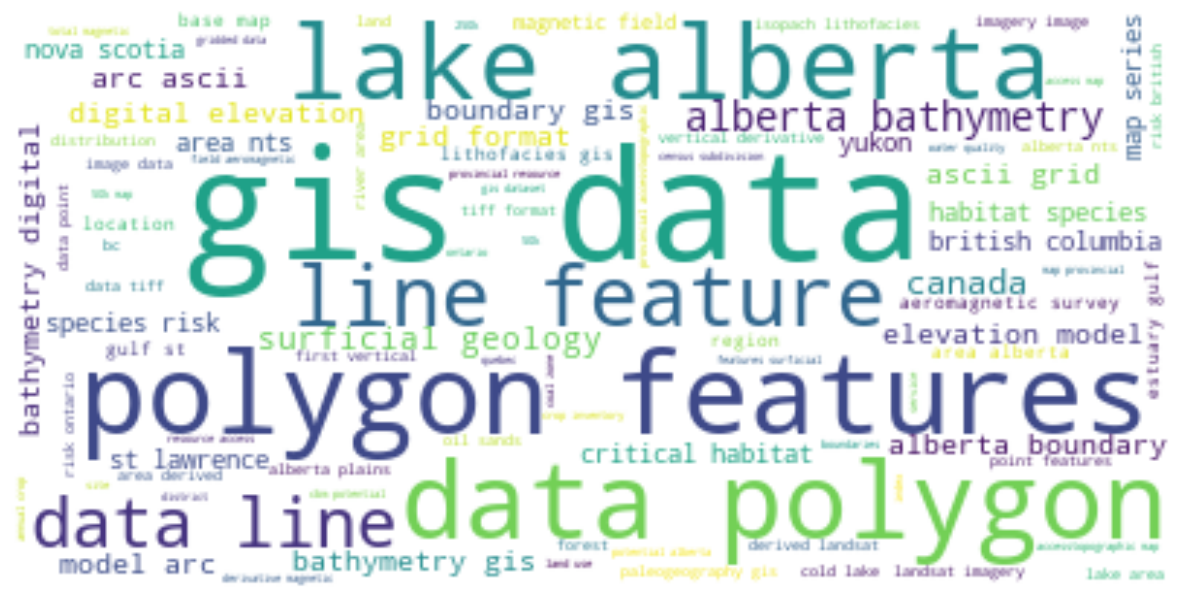

In [16]:
text = " ".join(i for i in df_en['title_en_cleaned'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
print('Word count for all the titles are {}'. format(len(text)))
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


### Upload cleaned text to S3 as parquet file 

In [17]:
s3_url = 's3://webpresence-search-similarity-data-dev/records_cleaned_for_ml.parquet'
def upload_parquet_s3(s3_url, df):
    df.to_parquet(s3_url) # s3fs is required 

upload_parquet_s3(s3_url, df_en)

In [18]:
file_name = 'record_ml_cleaned.parquet'
def upload_json_s3(file_name, bucket_name, df, object_name=None):
    """Upload a file to an S3 bucket
    :param file_name: File to upload
    :param bucket_name: Bucket to upload to
    :param object_name: S3 object name. If not specified then file_name is used
    :param df: pandas dataframe
    :return: True if file was uploaded, else False
    """
    # If S3 object_name was not specified, use file_name
    if object_name is None:
        object_name = os.path.basename(file_name)
    # boto3.client vs boto3.resources:https://www.learnaws.org/2021/02/24/boto3-resource-client/ 
    s3 = boto3.resource('s3')
    s3object = s3.Object(bucket_name, file_name)
    
    out_buffer = io.BytesIO()
    df.to_parquet(out_buffer, index=False)   
        
    try: 
        response = s3object.put_object(Bucket=bucket_name, Key=filename, Body=out_buffer.getvalue())
    except ClientError as e:
        logging.error(e)
        return False 
    return True 
upload_json_s3(file_name, bucket_name, df_text, object_name=None)


NameError: name 'df_text' is not defined